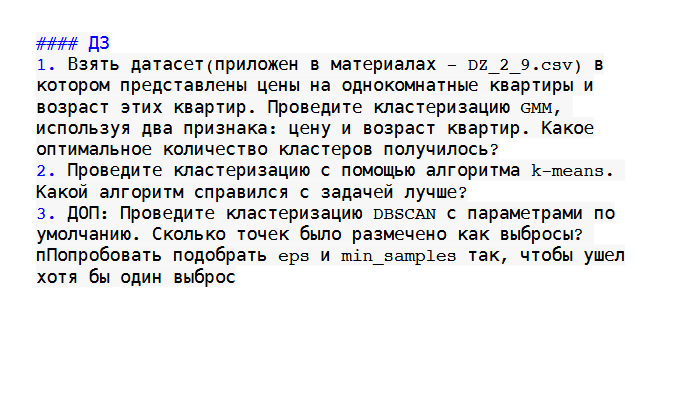

Загрузим библиотеки

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

Загрузим данные

In [ ]:
df = pd.read_csv('DZ_2_9.csv')
df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


Извлечем признаки (год и цена)

In [ ]:
X = df[['year', 'price']]

Стандартизируем признаки

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Применим GMM и найдем оптимальное количество кластеров с помощью BIC

In [ ]:
n_clusters = np.arange(1, 20)
bic_scores = []
aic_scores = []

In [ ]:
for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))

Визуализируем BIC и AIC

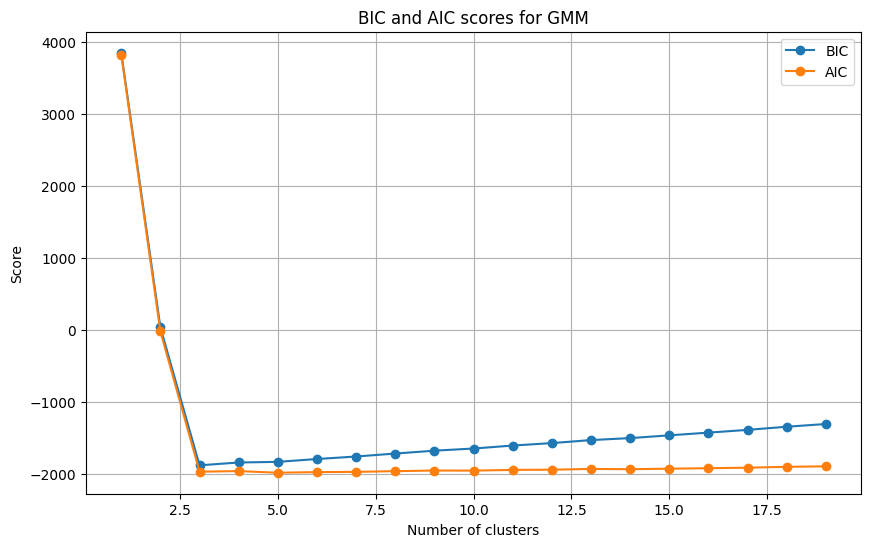

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_clusters, bic_scores, label='BIC', marker='o')
plt.plot(n_clusters, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('BIC and AIC scores for GMM')
plt.legend()
plt.grid(True)
plt.show()

Оптимальное количество кластеров - там, где BIC минимален

In [ ]:
optimal_n_clusters = n_clusters[np.argmin(bic_scores)]
print(f"Оптимальное количество кластеров: {optimal_n_clusters}")

Оптимальное количество кластеров: 3


Применим K-Means кластеризацию с тем же количеством кластеров

In [ ]:
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Оценим качество кластеризации с помощью силуэтного коэффициента для K-Means

In [ ]:
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f"Силуэтный коэффициент для K-Means: {silhouette_kmeans}")

Силуэтный коэффициент для K-Means: 0.6934958320689777


Визуализируем кластеры для K-Means

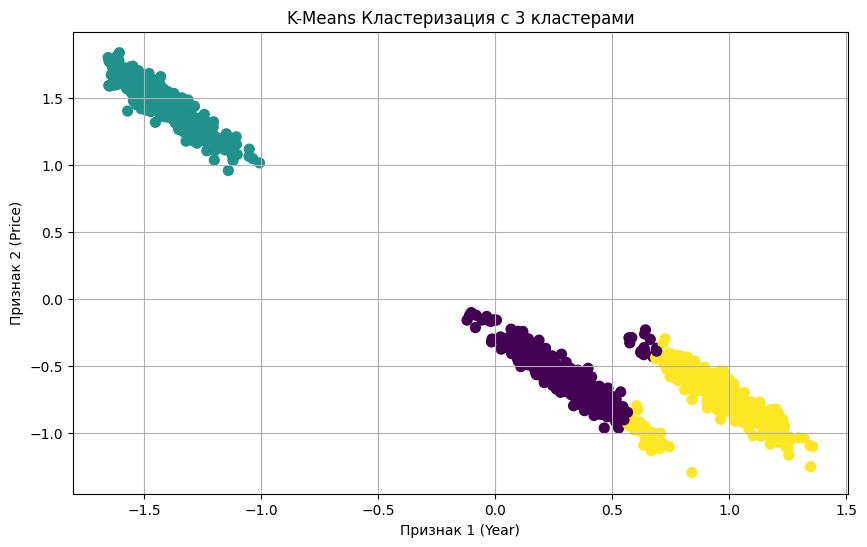

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title(f'K-Means Кластеризация с {optimal_n_clusters} кластерами')
plt.xlabel('Признак 1 (Year)')
plt.ylabel('Признак 2 (Price)')
plt.grid(True)
plt.show()

Два кластера в нижнем правом углу накладываются друг на друга, это плохо

Чтобы оценить, какой алгоритм справился с задачей лучше, проведем силуэтный анализ и для GMM. Получим предсказанные метки для GMM

In [ ]:
gmm_labels = GaussianMixture(n_components=optimal_n_clusters, random_state=42).fit_predict(X_scaled)

Оценим качество кластеризации с помощью силуэтного коэффициента для GMM

In [ ]:
silhouette_gmm = silhouette_score(X_scaled, gmm_labels)
print(f"Силуэтный коэффициент для GMM: {silhouette_gmm}")

Силуэтный коэффициент для GMM: 0.6875918045030679


Визуализируем кластеры для GMM

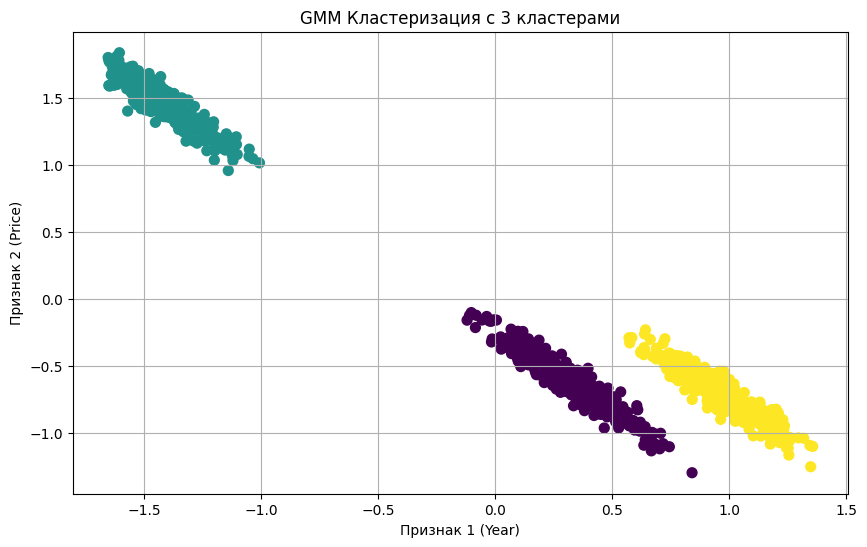

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis', s=50)
plt.title(f'GMM Кластеризация с {optimal_n_clusters} кластерами')
plt.xlabel('Признак 1 (Year)')
plt.ylabel('Признак 2 (Price)')
plt.grid(True)
plt.show()

Тут нет пересечений кластеров, из чего мы модем сделать вывод, что с задачей лучше справился GMM